In [1]:






import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CARICA I RIUSLTATI DELLA PCA

In [2]:
loading_matrix = pd.read_csv("loading_matrix.csv", index_col=0)
explained_variance = pd.read_csv("explained_variance.csv")

VISUALIZZA  LA VARIANZA CUMULATIVA

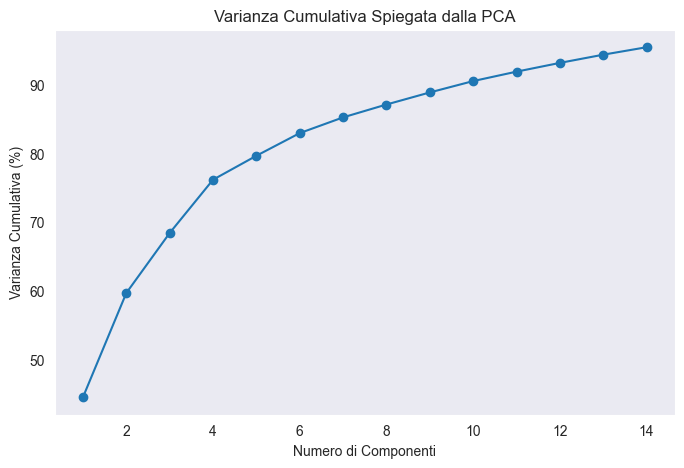

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance['Varianza Spiegata (%)'].cumsum(), marker='o')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Cumulativa (%)')
plt.title('Varianza Cumulativa Spiegata dalla PCA')
plt.grid()
plt.show()

IDENTIFICA LE COMPONENTI CON BASSA VARIANZA

In [4]:
low_variance_components = explained_variance[explained_variance['Varianza Spiegata (%)'] < 1]
print("Componenti con bassa varianza:")
print(low_variance_components)

Componenti con bassa varianza:
Empty DataFrame
Columns: [Unnamed: 0, Componente, Varianza Spiegata (%)]
Index: []


vISUALIZZA IL CONTRIBUTO DELLE FEATURES

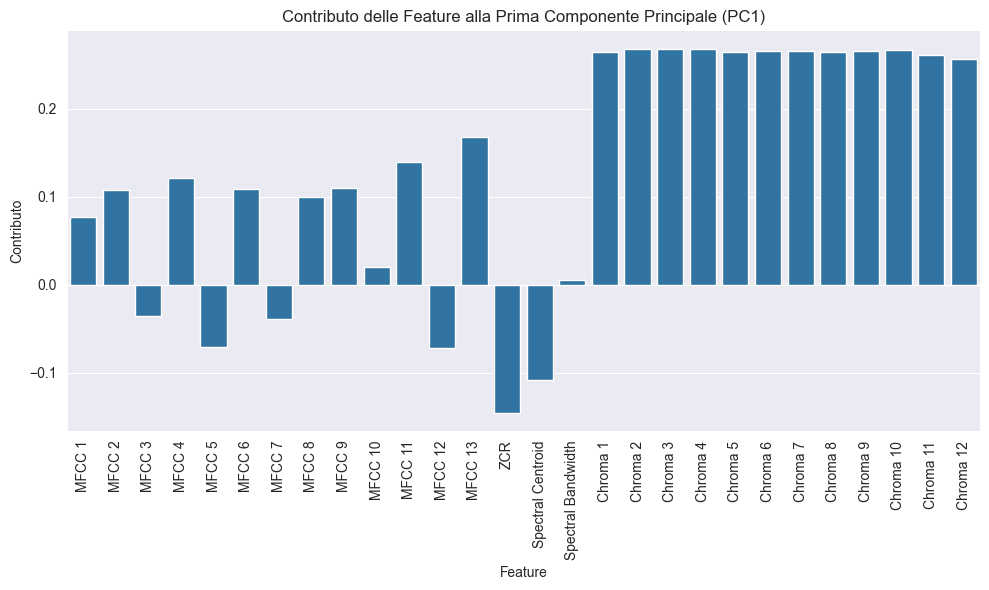

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=loading_matrix.columns, y=loading_matrix.iloc[0])
plt.xticks(rotation=90)
plt.title('Contributo delle Feature alla Prima Componente Principale (PC1)')
plt.xlabel('Feature')
plt.ylabel('Contributo')
plt.tight_layout()
plt.show()

CALCOLO DEL CONTRIBUTO MEDIO ASSOLUTO DELLE FEATURES

In [6]:
feature_contribution = loading_matrix.abs().mean(axis=0)
feature_contribution_sorted = feature_contribution.sort_values(ascending=False)

STAMPA FEATURES PIU INFULENTI

In [7]:
print("Feature più influenti in media sulle componenti principali:")
print(feature_contribution_sorted.head(10))

Feature più influenti in media sulle componenti principali:
MFCC 11    0.209394
MFCC 8     0.205173
MFCC 3     0.204012
MFCC 10    0.202036
MFCC 1     0.191381
MFCC 13    0.188204
MFCC 9     0.178470
ZCR        0.175838
MFCC 12    0.171658
MFCC 4     0.171422
dtype: float64


SALVA IL RANKING DELLE FEATURES

In [9]:
feature_contribution_sorted.to_csv("feature_contribution.csv",index=False)